In [28]:
import pandas as pd
import string
import re
from nltk.corpus import stopwords
import nltk
from nltk import word_tokenize, FreqDist
from nltk import WordNetLemmatizer, bigrams, trigrams
from gensim import corpora, models, similarities
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [29]:
df = pd.read_csv('processed_data_1014.csv')

In [30]:
def remove_special_char(phrase):
    phrase = re.sub(r"\•|\-|\/", ' ', phrase)
    phrase = re.sub(r'\.\b', '. ', phrase)
    return phrase

In [31]:
def remove_punctuation(text):
    text = remove_special_char(text)
    table = str.maketrans({key: None for key in string.punctuation})
    text_nopunc = text.translate(table)
    return text_nopunc

In [32]:
def convert_lower(text):
    return text.lower()

In [33]:
def remove_stopword(text):
    stop = stopwords.words('english') + ['heshe']
    text_nostop=" ".join(filter(lambda word: word not in stop, text.split()))
    return text_nostop

In [34]:
def preprocess(text):
    text = remove_special_char(text)
    text = remove_punctuation(text)
    text = convert_lower(text)
    text = remove_stopword(text)
    return text

In [35]:
wnl = WordNetLemmatizer()
docs = [preprocess(doc) for doc in df.job_description.tolist()]
# tokenize and lemmatization
texts = [[wnl.lemmatize(word) for word in word_tokenize(doc)] for doc in docs]


In [36]:
bitexts = [[" ".join(w) for w in bigrams(doc)] for doc in texts]
mixtexts = [[w for w in doc] + [" ".join(bw) for bw in bigrams(doc)] for doc in texts]


### First try 3 LDA topics

In [48]:
# load id->word mapping (the dictionary)
dictionary = corpora.Dictionary(mixtexts)

# filter the dictionary frequency
dictionary.filter_extremes(no_below=5, no_above=0.5)
dictionary.save('dict_v1.dict')

#load corpus
corpus = [dictionary.doc2bow(text) for text in mixtexts]

# initialize a model
tfidf = models.TfidfModel(corpus)

# use the model to transform vectors, apply a transformation to a whole corpus
corpus_tfidf = tfidf[corpus]

# extract 100 LDA topics, using 1 pass and updating once every 1 chunk (10,000 documents), using 500 iterations
lda_topic = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=3, iterations=500, random_state=96)

lda_topic.print_topics(num_words=8)

[(0,
  '0.005*"research" + 0.004*"experience" + 0.003*"software" + 0.003*"analytics" + 0.003*"application" + 0.003*"model" + 0.003*"system" + 0.003*"security"'),
 (1,
  '0.005*"product" + 0.005*"google" + 0.004*"marketing" + 0.004*"experience" + 0.004*"customer" + 0.004*"company" + 0.004*"engineering" + 0.004*"service"'),
 (2,
  '0.005*"client" + 0.005*"solution" + 0.004*"data science" + 0.004*"analytics" + 0.004*"ai" + 0.004*"design" + 0.004*"science" + 0.004*"technology"')]

In [ ]:
def ReturnLDA_TopicLabel (lda, dtm) :  
    '''
    Parameter Description:
    - input:
    lda: model
    dtm: matrix
    - return
    a list of the topic label of each record
    '''
    all_topics = lda.get_document_topics(dtm, per_word_topics=True)
    doc_topics_list = []
    for doc_topics, word_topics, phi_values in all_topics:
         doc_topics_list = doc_topics_list + [doc_topics]
    topic_label = []
    for doc in doc_topics_list:
        topic_label.append(max(doc, key = lambda x: x[1])[0])
    return topic_label

In [38]:
for index, score in sorted(lda[corpus_tfidf[10]], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda.print_topic(index, 10)))


Score: 0.6969201564788818	 Topic: 0.001*"research" + 0.001*"experience" + 0.001*"application" + 0.001*"google" + 0.001*"implement" + 0.001*"product" + 0.001*"technique" + 0.001*"algorithm" + 0.001*"computer vision" + 0.001*"user"
Score: 0.2717360556125641	 Topic: 0.001*"ai" + 0.001*"research" + 0.001*"analytics" + 0.001*"engineering" + 0.001*"solution" + 0.001*"service" + 0.001*"software" + 0.001*"urban" + 0.001*"digital" + 0.001*"’"
Score: 0.031343743205070496	 Topic: 0.001*"deep" + 0.001*"industry" + 0.001*"developer" + 0.001*"solution" + 0.001*"deep learning" + 0.001*"product" + 0.001*"technical" + 0.001*"financial" + 0.001*"research" + 0.001*"new"


# ---------------------------------------------------------------------

### Try 8 LDA topics and use pyLDAvis to visualize

In [39]:
wnl = WordNetLemmatizer()
docs = [preprocess(doc) for doc in df.job_description_nn.tolist()]
# tokenize and lemmatization
texts = [[wnl.lemmatize(word) for word in word_tokenize(doc)] for doc in docs]
bitexts = [[" ".join(w) for w in bigrams(doc)] for doc in texts]
mixtexts = [[w for w in doc] + [" ".join(bw) for bw in bigrams(doc)] for doc in texts]


In [44]:
# load id->word mapping (the dictionary)
dictionary = corpora.Dictionary(mixtexts)

# filter the dictionary frequency
dictionary.filter_extremes(no_below=5, no_above=0.5)
dictionary.save('dict_v1.dict')

#load corpus
corpus = [dictionary.doc2bow(text) for text in mixtexts]

# initialize a model
tfidf = models.TfidfModel(corpus)

# use the model to transform vectors, apply a transformation to a whole corpus
corpus_tfidf = tfidf[corpus]

# extract 100 LDA topics, using 1 pass and updating once every 1 chunk (10,000 documents), using 500 iterations
lda = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=8, iterations=500, random_state=96)

lda.print_topics(num_words=8)



[(0,
  '0.005*"research" + 0.004*"ai" + 0.004*"processing" + 0.004*"experience" + 0.004*"security" + 0.004*"language" + 0.004*"network" + 0.003*"application"'),
 (1,
  '0.006*"google" + 0.004*"business" + 0.004*"data analysis" + 0.004*"course" + 0.004*"customer" + 0.004*"research" + 0.004*"information" + 0.003*"engineering"'),
 (2,
  '0.005*"analytics application" + 0.005*"analytics" + 0.005*"solution" + 0.005*"analysis" + 0.004*"management" + 0.004*"project" + 0.004*"process" + 0.004*"capability"'),
 (3,
  '0.005*"process" + 0.005*"research" + 0.005*"developer" + 0.004*"ai" + 0.004*"development" + 0.004*"software" + 0.004*"algorithm" + 0.004*"fusion"'),
 (4,
  '0.006*"experience" + 0.005*"product" + 0.005*"code" + 0.005*"model" + 0.004*"system" + 0.004*"client" + 0.004*"lab" + 0.004*"service"'),
 (5,
  '0.006*"client" + 0.005*"computer vision" + 0.005*"vision" + 0.004*"service" + 0.004*"marketing" + 0.004*"analytics" + 0.004*"product" + 0.004*"business"'),
 (6,
  '0.008*"traffic" + 0.

In [45]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary, R=20)


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
4      26.034916        1       1 -0.032006 -0.020855
0      16.764324        1       2  0.016038  0.019130
2      14.048378        1       3  0.018281 -0.025517
5      12.202789        1       4 -0.023893 -0.010709
3      11.544685        1       5  0.030292  0.001911
7       8.284359        1       6  0.002583 -0.007602
6       5.928996        1       7 -0.025212  0.036018
1       5.191550        1       8  0.013918  0.007624, topic_info=     Category       Freq                      Term      Total  loglift  \
term                                                                     
965   Default  25.000000                   traffic  25.000000  20.0000   
766   Default  23.000000                    google  23.000000  19.0000   
510   Default  24.000000                    school  24.000000  18.0000   
126   Default  37.000000                  customer  37.000000  17.0000   
418   Default  21.000000                   nanyang  21.000000  16.0000   
406   Default  30.000000           computer vision  30.000000  15.0000   
419   Default  19.000000     nanyang technological  19.000000  14.0000   
430   Default  19.000000             technological  19.000000  13.0000   
149   Default  71.000000                  research  71.000000  12.0000   
527   Default  16.000000                    region  16.000000  11.0000   
664   Default  31.000000                   vehicle  31.000000  10.0000   
431   Default  17.000000  technological university  17.000000   9.0000   
785   Default  19.000000     analytics application  19.000000   8.0000   
718   Default  17.000000                    course  17.000000   7.0000   
600   Default  25.000000             data analysis  25.000000   6.0000   
9     Default  42.000000                   company  42.000000   5.0000   
210   Default  32.000000                 marketing  32.000000   4.0000   
960   Default  14.000000                      byte  14.000000   3.0000   
7     Default  25.000000                 behaviour  25.000000   2.0000   
21    Default  44.000000               engineering  44.000000   1.0000   
679    Topic1  13.397070      learning application  21.134043   0.8899   
708    Topic1  11.633573         production system  18.573523   0.8779   
87     Topic1  17.595535                       lab  29.543079   0.8275   
390    Topic1  15.399656                   trading  26.343527   0.8089   
547    Topic1  11.115663               member team  19.327215   0.7926   
72     Topic1  12.986037                compliance  22.818340   0.7820   
541    Topic1  12.356191                      firm  21.907881   0.7730   
563    Topic1  12.704713                    speech  23.096277   0.7480   
165    Topic1  22.995892                      code  43.091423   0.7177   
369    Topic1  13.511182          model production  25.355457   0.7163   
...       ...        ...                       ...        ...      ...   
555    Topic8   1.509416                     state  11.136270   0.9597   
556    Topic8   1.509296                 state art  11.136191   0.9596   
963    Topic8   1.916665                classifier  14.364258   0.9440   
724    Topic8   1.817791                  question  13.752040   0.9346   
788    Topic8   1.905893          mining technique  14.760685   0.9111   
208    Topic8   1.718489                    manner  13.554478   0.8929   
613    Topic8   1.354542                 equipment  10.732748   0.8883   
200    Topic8   2.830544                     group  22.534771   0.8835   
372    Topic8   2.355620                     scale  18.916058   0.8749   
779    Topic8   2.065979              conduct data  16.991020   0.8511   
924    Topic8   2.330794                     urban  19.806084   0.8184   
466    Topic8   2.570163              organization  22.465464   0.7901   
75     Topic8   3.064266               data mining  31.336948   0.6331   
68     Topic8

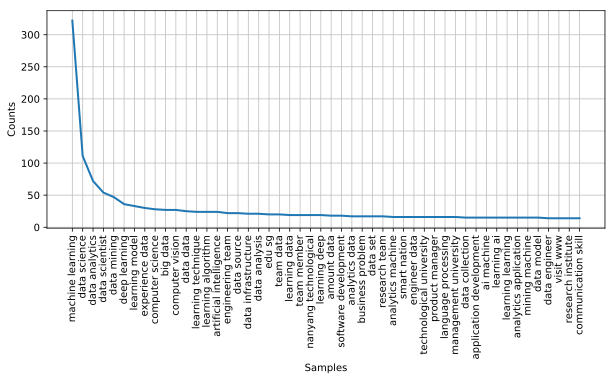

In [16]:
words = [item for sublist in bitexts for item in sublist]
freqdist = nltk.FreqDist(words)
plt.figure(figsize=(10,4))
freqdist.plot(50)

plt.show()

In [17]:
from collections import Counter

In [49]:
all_words = [item for sublist in mixtexts for item in sublist]

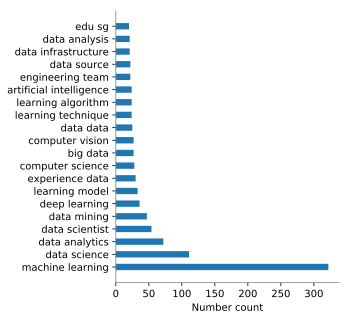

In [19]:
counts = Counter(all_words).most_common(20)
rankinglist = list(zip(*counts))

fig,ax = plt.subplots(figsize=(4,5))
from numpy import arange
ax.set_xlabel("Number count")

ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')

tick_positions = range(1,21)
ax.set_yticks(tick_positions)
ax.set_yticklabels(rankinglist[0],fontsize=10,color="black")
bar_positions = arange(20) + 0.75
ax.barh(bar_positions, rankinglist[1], 0.5,align="edge")
plt.show(ax)



In [88]:
from wordcloud import WordCloud
from scipy.misc import imread
import random
strs = ' '.join(df.job_description_nn.tolist())

mask = imread('./Fancy-Shape.png')
wc = WordCloud(font_path='./SourceSansPro-Regular.otf',
                   background_color="White",  
                   max_words=400,  
                   mask=mask,  
                   random_state=42,
                   )
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python3.6/site-packages/scipy/misc/pilutil.py:165: DeprecationWarning: `fromimage` is deprecated!
`fromimage` is deprecated in SciPy 1.0.0. and will be removed in 1.2.0.
Use ``np.asarray(im)`` instead.
  return fromimage(im, flatten=flatten, mode=mode)


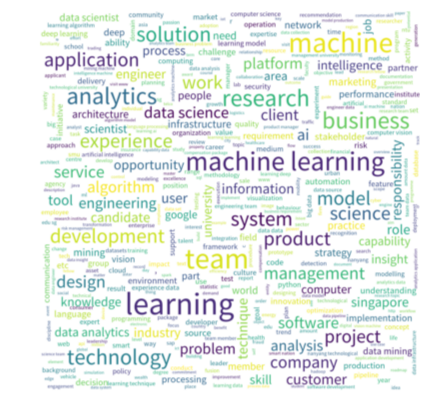

In [90]:

wc.fit_words(aa)

plt.figure(figsize=(7, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show(wc.recolor(color_func=grey_color_func, random_state=3))